In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(Path("../Resources/relabeled_data.csv"))
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0


In [4]:
data.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307,0.066343
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038,0.248882
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000,0.000000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500,0.000000
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000,0.000000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250,0.000000
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000,1.000000


## Analize and Cleanup Data as needed

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current_assets                 78682 non-null  float64
 1   cost_of_goods_sold             78682 non-null  float64
 2   depreciation_and_amortization  78682 non-null  float64
 3   EBITDA                         78682 non-null  float64
 4   inventory                      78682 non-null  float64
 5   net_income                     78682 non-null  float64
 6   total_receivables              78682 non-null  float64
 7   market_value                   78682 non-null  float64
 8   net_sales                      78682 non-null  float64
 9   total_assets                   78682 non-null  float64
 10  total_long_term_debt           78682 non-null  float64
 11  EBIT                           78682 non-null  float64
 12  gross_profit                   78682 non-null 

In [6]:
{column: len(data[column].unique()) for column in data.columns}

{'current_assets': 65895,
 'cost_of_goods_sold': 65690,
 'depreciation_and_amortization': 36010,
 'EBITDA': 59060,
 'inventory': 38898,
 'net_income': 55550,
 'total_receivables': 49577,
 'market_value': 77580,
 'net_sales': 68596,
 'total_assets': 71521,
 'total_long_term_debt': 39741,
 'EBIT': 56949,
 'gross_profit': 64952,
 'total_current_liabilities': 58685,
 'retained_earnings': 72062,
 'total_revenue': 68596,
 'total_liabilities': 64640,
 'total_operationg_expenses': 70840,
 'status': 2}

In [7]:
# There are NO single value columns to drop from the dataframe

## Preprocessing

In [10]:
def preprocess_inputs(df):
    df = data.copy()

    #split data into X and y
    
    y = data["status"]
    X = data.drop("status", axis=1)
    
    #Train split 
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, shuffle= True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [12]:
X_train

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
59024,-0.222055,-0.175354,-0.181781,-0.186881,-0.188153,-0.102688,-0.211660,-0.187295,-0.195418,-0.217424,-0.218640,-0.171034,-0.201840,-0.203831,-0.088199,-0.195418,-0.215442,-0.187666
33685,-0.063482,0.070741,-0.140793,-0.056127,-0.031474,-0.000058,0.098372,-0.133867,0.045588,-0.131942,-0.135047,-0.011571,-0.022767,-0.095236,-0.031299,0.045588,-0.135671,0.063127
9607,-0.223025,-0.180246,-0.180813,-0.188538,-0.187260,-0.105044,-0.211087,-0.187515,-0.199667,-0.218232,-0.218302,-0.173741,-0.203704,-0.205188,-0.085661,-0.199667,-0.215817,-0.192214
49536,-0.221114,-0.180708,-0.182109,-0.193619,-0.187246,-0.111877,-0.211292,-0.184507,-0.199747,-0.217886,-0.219148,-0.180076,-0.202873,-0.204952,-0.096640,-0.199747,-0.216207,-0.191320
41877,-0.147144,-0.163493,-0.157437,-0.213375,-0.181467,-0.157566,-0.208175,-0.145813,-0.191619,-0.172417,-0.100725,-0.218420,-0.217706,-0.189943,-0.182518,-0.191619,-0.161593,-0.178173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-0.224612,-0.181104,-0.182150,-0.188860,-0.189505,-0.104686,-0.212726,-0.188056,-0.200593,-0.218955,-0.219160,-0.173564,-0.204595,-0.205550,-0.085822,-0.200593,-0.216428,-0.193213
73349,-0.149560,-0.152019,-0.135760,-0.198096,-0.078141,-0.130112,-0.160322,-0.176021,-0.170367,-0.190801,-0.215364,-0.207583,-0.177971,-0.165899,-0.162478,-0.170367,-0.199710,-0.156786
50057,-0.223302,-0.178006,-0.181029,-0.202368,-0.189505,-0.126890,-0.212385,-0.183309,-0.200598,-0.218217,-0.219020,-0.192510,-0.211865,-0.203875,-0.104139,-0.200598,-0.215721,-0.190598
5192,0.999626,0.994307,0.583536,0.655105,1.485818,0.309072,1.526455,0.082072,0.921225,0.624294,0.606945,0.624343,0.558924,1.095151,0.280534,0.921225,0.755422,0.928506


In [13]:
y_train

59024    0
33685    0
9607     0
49536    0
41877    0
        ..
21440    0
73349    0
50057    0
5192     1
77708    0
Name: status, Length: 55077, dtype: int64

## Training - Original Data

In [15]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [17]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 93.62%
                   K-Nearest Neighbors: 94.24%
                         Decision Tree: 89.59%
Support Vector Machine (Linear Kernel): 93.62%
   Support Vector Machine (RBF Kernel): 93.67%
                        Neural Network: 93.65%
                         Random Forest: 93.97%
                     Gradient Boosting: 93.64%


In [18]:
y_test.value_counts() / len(y_test)

0    0.936327
1    0.063673
Name: status, dtype: float64

In [19]:
X_train

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
59024,-0.222055,-0.175354,-0.181781,-0.186881,-0.188153,-0.102688,-0.211660,-0.187295,-0.195418,-0.217424,-0.218640,-0.171034,-0.201840,-0.203831,-0.088199,-0.195418,-0.215442,-0.187666
33685,-0.063482,0.070741,-0.140793,-0.056127,-0.031474,-0.000058,0.098372,-0.133867,0.045588,-0.131942,-0.135047,-0.011571,-0.022767,-0.095236,-0.031299,0.045588,-0.135671,0.063127
9607,-0.223025,-0.180246,-0.180813,-0.188538,-0.187260,-0.105044,-0.211087,-0.187515,-0.199667,-0.218232,-0.218302,-0.173741,-0.203704,-0.205188,-0.085661,-0.199667,-0.215817,-0.192214
49536,-0.221114,-0.180708,-0.182109,-0.193619,-0.187246,-0.111877,-0.211292,-0.184507,-0.199747,-0.217886,-0.219148,-0.180076,-0.202873,-0.204952,-0.096640,-0.199747,-0.216207,-0.191320
41877,-0.147144,-0.163493,-0.157437,-0.213375,-0.181467,-0.157566,-0.208175,-0.145813,-0.191619,-0.172417,-0.100725,-0.218420,-0.217706,-0.189943,-0.182518,-0.191619,-0.161593,-0.178173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-0.224612,-0.181104,-0.182150,-0.188860,-0.189505,-0.104686,-0.212726,-0.188056,-0.200593,-0.218955,-0.219160,-0.173564,-0.204595,-0.205550,-0.085822,-0.200593,-0.216428,-0.193213
73349,-0.149560,-0.152019,-0.135760,-0.198096,-0.078141,-0.130112,-0.160322,-0.176021,-0.170367,-0.190801,-0.215364,-0.207583,-0.177971,-0.165899,-0.162478,-0.170367,-0.199710,-0.156786
50057,-0.223302,-0.178006,-0.181029,-0.202368,-0.189505,-0.126890,-0.212385,-0.183309,-0.200598,-0.218217,-0.219020,-0.192510,-0.211865,-0.203875,-0.104139,-0.200598,-0.215721,-0.190598
5192,0.999626,0.994307,0.583536,0.655105,1.485818,0.309072,1.526455,0.082072,0.921225,0.624294,0.606945,0.624343,0.558924,1.095151,0.280534,0.921225,0.755422,0.928506


In [20]:
X_train.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
count,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04
mean,1.573960e-17,-2.701125e-18,1.071228e-17,-4.929856e-17,3.936084e-16,1.381782e-17,3.936286e-17,6.901275e-17,-5.302924e-17,3.431840e-19,-2.233695e-16,2.223691e-17,-4.735385e-17,6.233754e-18,9.772178e-18,-5.302924e-17,2.912781e-18,-3.055396e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.273272e-01,-2.225922e-01,-1.822030e-01,-1.112985e+01,-1.895049e-01,-4.534381e+01,-2.127404e-01,-1.881227e-01,-3.667201e-01,-2.191894e-01,-2.191668e-01,-1.782512e+01,-5.910257e+00,-2.056187e-01,-1.634958e+01,-3.667201e-01,-2.164531e-01,-2.239785e-01
25%,-2.205040e-01,-1.791874e-01,-1.804295e-01,-1.891148e-01,-1.895049e-01,-1.104539e-01,-2.103007e-01,-1.861694e-01,-1.982737e-01,-2.163387e-01,-2.191599e-01,-1.752574e-01,-2.023334e-01,-2.026411e-01,-9.506211e-02,-1.982737e-01,-2.148065e-01,-1.900741e-01
50%,-1.995274e-01,-1.692660e-01,-1.703746e-01,-1.809428e-01,-1.828703e-01,-1.031000e-01,-1.957555e-01,-1.754919e-01,-1.846506e-01,-2.027964e-01,-2.167732e-01,-1.687431e-01,-1.874862e-01,-1.910476e-01,-8.420452e-02,-1.846506e-01,-2.063995e-01,-1.767400e-01
75%,-1.149355e-01,-1.087310e-01,-1.108019e-01,-1.184934e-01,-1.183685e-01,-7.180591e-02,-1.149847e-01,-1.183465e-01,-1.114809e-01,-1.296011e-01,-1.436635e-01,-1.134247e-01,-1.128138e-01,-1.307354e-01,-6.050905e-02,-1.114809e-01,-1.395782e-01,-1.079439e-01
max,3.540886e+01,4.087766e+01,4.176376e+01,4.061899e+01,5.856607e+01,8.439082e+01,4.857653e+01,5.919029e+01,4.179690e+01,4.011333e+01,5.005171e+01,4.834812e+01,3.527494e+01,3.889310e+01,6.437934e+01,4.179690e+01,4.075066e+01,4.510358e+01


## Dimensionality Reduction (PCA)

In [22]:
n_components = 18

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [23]:
X_train_reduced.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
count,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04,5.507700e+04
mean,7.750013e-17,-1.594503e-17,3.932128e-17,1.014963e-17,3.984554e-18,-3.160216e-18,2.673623e-17,1.813549e-17,7.394866e-19,-3.775497e-18,8.413647e-18,-3.155429e-18,3.656409e-18,4.390512e-18,-2.519702e-18,9.101877e-19,-6.944548e-18,8.305111e-19
std,3.648637e+00,1.234234e+00,9.951126e-01,7.550495e-01,6.699054e-01,5.823102e-01,5.372434e-01,3.851765e-01,3.736463e-01,2.756955e-01,2.560915e-01,2.519806e-01,1.619726e-01,9.118650e-02,1.984228e-06,1.932441e-07,3.359491e-08,1.504769e-16
min,-9.399651e+00,-3.826940e+01,-3.249698e+01,-2.728388e+01,-1.940215e+01,-2.538496e+01,-3.225276e+01,-1.000178e+01,-1.130000e+01,-9.103270e+00,-6.218475e+00,-7.334708e+00,-5.013465e+00,-3.654396e+00,-2.886867e-06,-1.629228e-06,-2.199093e-06,-7.418541e-15
25%,-7.986366e-01,-8.318439e-03,4.244646e-02,1.451796e-02,-1.523203e-02,-2.885959e-02,-5.288009e-03,5.283229e-03,-1.899468e-02,-1.073260e-02,3.660918e-05,-5.078600e-04,-6.601039e-03,-2.134263e-03,-1.033509e-08,-1.066536e-09,-7.963715e-11,6.936197e-18
50%,-7.464745e-01,-1.148916e-03,8.791180e-02,4.336333e-02,-7.838791e-03,-2.293953e-02,1.533208e-02,9.916201e-03,-1.004560e-02,-4.910542e-03,8.878614e-03,2.600118e-02,-4.765743e-03,-1.445527e-03,-1.025797e-08,-1.057958e-09,-7.904004e-11,1.964342e-17
75%,-4.543558e-01,1.982873e-02,9.698144e-02,5.110295e-02,7.827631e-03,-2.436027e-03,2.088653e-02,2.139434e-02,-4.569210e-04,6.827309e-04,1.206102e-02,3.001697e-02,2.001569e-03,6.539602e-04,-9.880675e-09,-1.018887e-09,-7.638547e-11,3.050925e-17
max,1.260095e+02,5.118379e+01,3.467331e+01,4.375889e+01,3.303241e+01,3.230515e+01,5.875208e+01,3.798605e+01,1.660213e+01,1.365360e+01,9.555273e+00,1.082638e+01,5.622502e+00,3.938531e+00,4.603941e-04,4.354983e-05,7.483591e-06,1.787818e-15


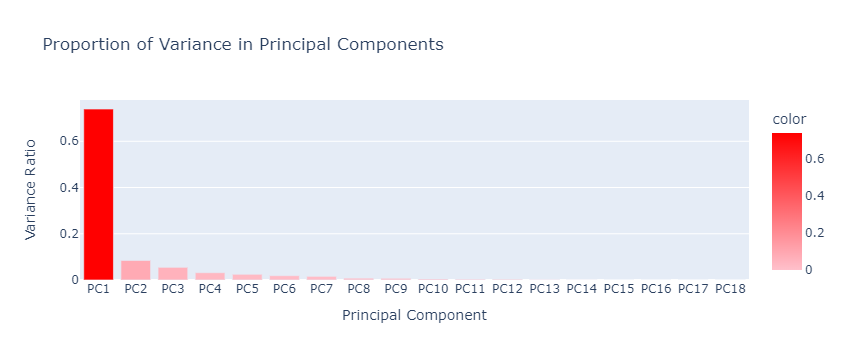

In [28]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'pink'), (1, 'red')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

In [26]:
pca.explained_variance_ratio_

array([7.39572595e-01, 8.46280661e-02, 5.50128415e-02, 3.16716370e-02,
       2.49313957e-02, 1.88377210e-02, 1.60347360e-02, 8.24212270e-03,
       7.75605876e-03, 4.22259180e-03, 3.64342522e-03, 3.52739370e-03,
       1.45748089e-03, 4.61934820e-04, 2.18727183e-13, 2.07458953e-15,
       6.26998483e-17, 3.36130897e-35])

In [30]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

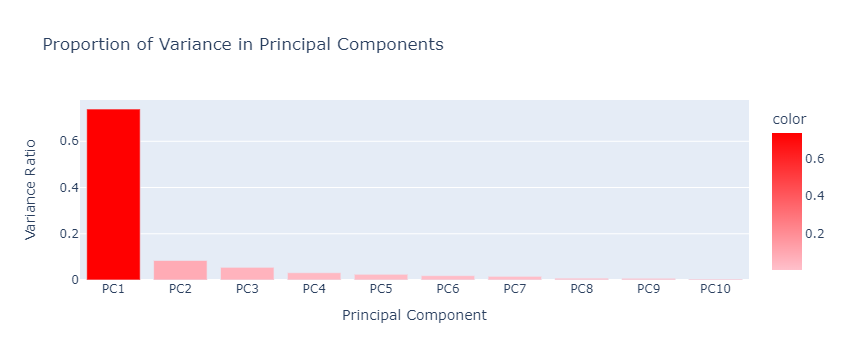

In [31]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'pink'), (1, 'red')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

In [34]:
reduced_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [35]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 93.63%
                   K-Nearest Neighbors: 93.93%
                         Decision Tree: 88.79%
Support Vector Machine (Linear Kernel): 93.62%
   Support Vector Machine (RBF Kernel): 93.66%
                        Neural Network: 93.68%
                         Random Forest: 93.84%
                     Gradient Boosting: 93.62%


## Change in Performance after PCA

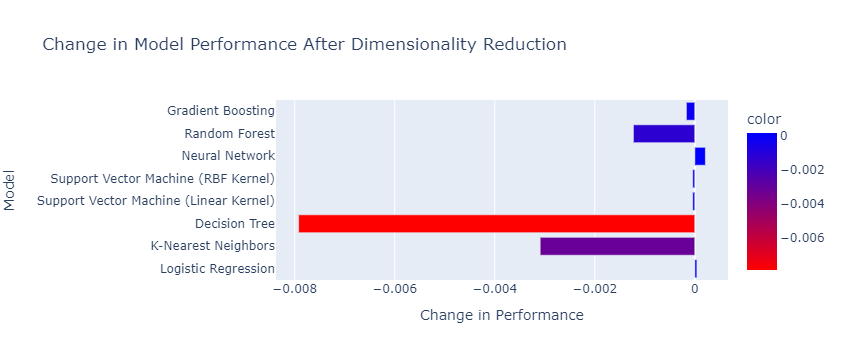

In [36]:
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)

fig.show()

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt